In [1]:
#% matplotlib inline

from datetime import datetime 
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
cmap = cm.get_cmap('Blues')
import random


In [2]:
# For plotting, from Luke

def compute_bounds(mu, sig, n_sigma = 3):
    """
    Use mean and standard deviation vectors to compute upper and lower bounds.
    """
    upper = mu + n_sigma * np.sqrt(np.abs(sig))
    lower = mu - n_sigma * np.sqrt(np.abs(sig))
    
    return upper, lower

In [3]:
#pull the variables that are needed from this
#read hdf5 file for this notebook
f1 = h5py.File("Data/Fig8.hdf5", "r")

#get the data for plotting the sd image

roimask = np.array(f1['roimask_motion'])
x_zoom = np.array(f1['x_zoom_motion'])
dataCh0 = np.array(f1['dataCh0_motion'])


f1.close()

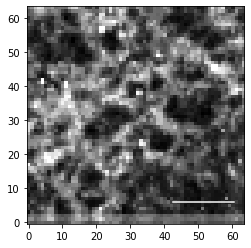

In [4]:
#calculate std
std = np.std(dataCh0, axis=2)  # standard deviation across time

plt.imshow(std, cmap='Greys_r', origin='lower', vmax=20)

#scale bar business
total_length = (71.5/x_zoom)
scale_bar_microns = 10
scale_bar_start = 24
plt.axhline(y=6, xmin=scale_bar_start/total_length, xmax=(scale_bar_microns+scale_bar_start)/total_length, color='white')


In [5]:
#pull data from hdf5 file
df_GP_rois = pd.read_hdf('Data/Fig8.hdf5', 'df_GP_rois')
df_GP_rois_average = pd.read_hdf('Data/Fig8.hdf5', 'df_GP_rois_average')


#open from hdf5 file

#read hdf5 file for this notebook
f1 = h5py.File("Data/Fig8.hdf5", "r")
sd_of_trace = np.array(f1['sd_of_trace'])
x_predict_t = np.array(f1['x_predict_t'])
mu = np.array(f1['mu'])
sig = np.array(f1['sig'])

f1.close()

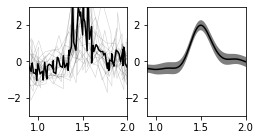

In [6]:
#plot the individual trials
# xvals = df_GP_rois['y'].loc[180, 100].index.to_frame(index=False)['time_bin']
direction = 90
index = 2

ytop=3
ybottom=-3

fig = plt.figure(figsize=(6,2))

ax1 = plt.subplot(1,3,1)
trial_list = df_GP_rois['trial_nums'].loc[direction,150].unique()
offset=0
for trial in trial_list:
    plt.plot(df_GP_rois[df_GP_rois['trial_nums']==trial]['x_t'], 
             df_GP_rois[df_GP_rois['trial_nums']==trial]['y']/sd_of_trace, alpha=0.2, color='k', linewidth=0.5)  
plt.plot(df_GP_rois_average['y'].loc[direction, 150]/sd_of_trace, color='k')
ax1.set_ylim([ybottom, ytop])
ax1.set_xlim([0.9, 2.0])


ax2 = plt.subplot(1,3,2)
trial_list = df_GP_rois['trial_nums'].loc[direction,150].unique()
offset=0
plt.plot(x_predict_t[:,0], mu[index,:]/sd_of_trace, color='k')
upper, lower = compute_bounds(mu[index,:]/sd_of_trace, sig[index,:]/sd_of_trace, n_sigma = 3)
plt.fill_between(x_predict_t[:,0], upper, lower, facecolor = 'k', alpha = 0.5)
ax2.set_ylim([ybottom, ytop])
ax2.set_xlim([0.9, 2.0])


plt.show()

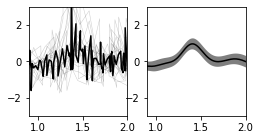

In [7]:
#plot the individual trials
# xvals = df_GP_rois['y'].loc[180, 100].index.to_frame(index=False)['time_bin']
direction = -90
index = 0

ytop=3
ybottom=-3

fig = plt.figure(figsize=(6,2))

ax1 = plt.subplot(1,3,1)
trial_list = df_GP_rois['trial_nums'].loc[direction,150].unique()
offset=0
for trial in trial_list:
    plt.plot(df_GP_rois[df_GP_rois['trial_nums']==trial]['x_t'], 
             df_GP_rois[df_GP_rois['trial_nums']==trial]['y']/sd_of_trace, alpha=0.2, color='k', linewidth=0.5)  
plt.plot(df_GP_rois_average['y'].loc[direction, 150]/sd_of_trace, color='k')
ax1.set_ylim([ybottom, ytop])
ax1.set_xlim([0.9, 2.0])


ax2 = plt.subplot(1,3,2)
trial_list = df_GP_rois['trial_nums'].loc[direction,150].unique()
offset=0

plt.plot(x_predict_t[:,0], mu[index,:]/sd_of_trace, color='k')
upper, lower = compute_bounds(mu[index,:]/sd_of_trace, sig[index,:]/sd_of_trace, n_sigma = 3)
plt.fill_between(x_predict_t[:,0], upper, lower, facecolor = 'k', alpha = 0.5)
ax2.set_ylim([ybottom, ytop])
ax2.set_xlim([0.9, 2.0])


plt.show()

# dsi results

In [8]:
#pull data to make panel i
dsi_results = pd.read_hdf('Data/Fig8.hdf5', 'dsi_results_panel_i')


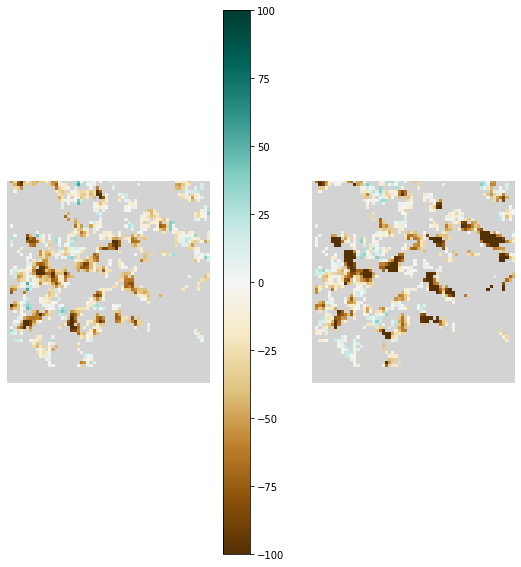

In [9]:
cm = plt.get_cmap('BrBG') #sns.diverging_palette(20, 220, n=50)

cm.set_bad(color='lightgrey')
color_range = 100

roi_list = dsi_results.index.to_frame(index=False)['pixel_id'].unique()

            
#make map for 150 length stimulus
dsmap1 = roimask*(-1)
xlength = dsmap1.shape[0]
ylength = dsmap1.shape[1]
for x in range(xlength):
    for y in range(ylength):  
        if dsmap1[x,y] in roi_list:
            roi_index = np.int(dsmap1[x, y])
            dsmap1[x,y] = dsi_results.loc[roi_index, 'dsi_150']
        else:
            dsmap1[x,y] = np.nan


            
#make map for 300 length stimulus            
dsmap2 = roimask*(-1)
xlength = dsmap2.shape[0]
ylength = dsmap2.shape[1]
for x in range(xlength):
    for y in range(ylength):  
        if dsmap2[x,y] in roi_list:
            roi_index = np.int(dsmap2[x, y])
            dsmap2[x,y] = dsi_results.loc[roi_index, 'dsi_300']
        else:
            dsmap2[x,y] = np.nan

            
            
fig = plt.figure(figsize=(10, 10))


ax1 = fig.add_subplot(1,2,1)
plt.imshow(dsmap1, cmap=cm, vmin=-1*color_range, vmax=color_range, origin='lower') #'RdYlBu'
cb = plt.colorbar()

plt.axis('off')


ax2 = fig.add_subplot(1,2,2)
plt.imshow(dsmap2, cmap=cm, vmin=-1*color_range, vmax=color_range, origin='lower') #'RdYlBu'
cb = plt.colorbar()

plt.axis('off')
cb.remove()
plt.draw()


plt.show()